In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import scikitplot as skplt

#To increase autocomplete response speed
%config IPCompleter.greedy=True

#Disabling warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
project_path = 'C:\\Users\\kunal\\MACHINE LEARNING PROJECTS\\CREDIT RISK ASSESSMENT'

In [3]:
df_name = 'df_input_pd.pickle'

In [4]:
df = pd.read_pickle(project_path + '/02_Data/03_Work/' + df_name)

In [5]:
def corr_strong(dataframe, lower_lim=0.3, upper_lim=1, drop_duplicates=True):
    c = dataframe.corr().unstack().to_frame().reset_index().rename(columns={'level_0':'var_0',
                                                                            'level_1':'var_1',
                                                                            0:'corr'})
    c['corr_sign'] = np.where(c['corr']>=0,'+','-')
    c['corr'] = c['corr'].transform(abs)
    c = c.rename(columns={'corr':'corr_abs'})
    
    condition = (c['corr_abs']>lower_lim) & (c['corr_abs']<upper_lim)
    c = c.loc[condition,:].sort_values(by='corr_abs',ascending=False)
    
    c = c if drop_duplicates==False else c.drop_duplicates(subset=['corr_abs'])
    return(c)

In [6]:
corr = corr_strong(df)
corr.var_1.value_counts()

var_1
scoring_oe_mms                  3
installment_qt_mms              2
home_ownership_RENT             2
n_mortages_qt_mms               2
purpose_debt_consolidation      2
loan_amount_qt_mms              2
revolving_utilization_qt_mms    1
annual_income_qt_mms            1
interest_rate_qt_mms            1
term_ 60 months                 1
home_ownership_MORTGAGE         1
dti_qt_mms                      1
Name: count, dtype: int64

In [7]:
corr

,var_0,var_1,corr_abs,corr_sign
793,interest_rate_qt_mms,scoring_oe_mms,0.917424,+
830,loan_amount_qt_mms,installment_qt_mms,0.908547,+
66,home_ownership_MORTGAGE,home_ownership_RENT,0.798734,-
680,p_credit_cards_exceeding_75p_disc_te_pd_mms,revolving_utilization_qt_mms,0.629331,+
90,home_ownership_MORTGAGE,n_mortages_qt_mms,0.623427,+
193,purpose_credit_card,purpose_debt_consolidation,0.619206,-
872,n_mortages_qt_mms,home_ownership_RENT,0.597365,-
706,annual_income_qt_mms,installment_qt_mms,0.438173,+
828,loan_amount_qt_mms,annual_income_qt_mms,0.430493,+
18,term_ 36 months,scoring_oe_mms,0.379523,-


In [8]:
df.drop(columns=['interest_rate_qt_mms','installment_qt_mms'],inplace=True)

In [9]:
corr = corr_strong(df)
corr.var_1.value_counts()

var_1
home_ownership_RENT                            2
home_ownership_MORTGAGE                        2
purpose_debt_consolidation                     2
term_ 60 months                                2
p_credit_cards_exceeding_75p_disc_te_pd_mms    1
annual_income_qt_mms                           1
scoring_oe_mms                                 1
loan_amount_qt_mms                             1
n_credit_lines_qt_mms                          1
n_mortages_qt_mms                              1
Name: count, dtype: int64

In [10]:
x = df.drop(columns='target_pd')
y = df.target_pd.copy()

In [11]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

In [12]:
pipe = Pipeline([('algorithm',LogisticRegression())])

grid = [{'algorithm': [LogisticRegression(solver='saga', n_jobs=-1)],
         'algorithm__penalty': ['elasticnet', 'l1', 'l2', 'none'],
         'algorithm__C': np.arange(0,1.1,0.1)}]

In [13]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 10, 
                           scoring = 'roc_auc',
                           verbose = 3,
                           n_jobs = -1)

model = grid_search.fit(train_x,train_y)

Fitting 10 folds for each of 44 candidates, totalling 440 fits


In [14]:
pd.DataFrame(grid_search.cv_results_)[['param_algorithm__C','param_algorithm__penalty','mean_test_score','std_test_score',
                                       'rank_test_score']].sort_values(by = 'rank_test_score')

,param_algorithm__C,param_algorithm__penalty,mean_test_score,std_test_score,rank_test_score
13,0.3,l1,0.701578,0.006228,1
17,0.4,l1,0.701577,0.006219,2
21,0.5,l1,0.701570,0.006220,3
25,0.6,l1,0.701565,0.006221,4
9,0.2,l1,0.701562,0.006238,5
29,0.7,l1,0.701559,0.006223,6
33,0.8,l1,0.701556,0.006224,7
37,0.9,l1,0.701553,0.006223,8
41,1.0,l1,0.701549,0.006224,9
34,0.8,l2,0.701513,0.006229,10


In [15]:
model.best_estimator_

Pipeline(steps=[('algorithm',
                 LogisticRegression(C=0.30000000000000004, n_jobs=-1,
                                    penalty='l1', solver='saga'))])

In [16]:
lr = LogisticRegression(n_jobs=-1, C=0.4, penalty='l1', solver='saga')
lr.fit(train_x,train_y)

LogisticRegression(C=0.4, n_jobs=-1, penalty='l1', solver='saga')

In [17]:
pred = lr.predict_proba(val_x)[:, 1]

In [18]:
roc_auc_score(val_y, pred)

0.6996942791820415

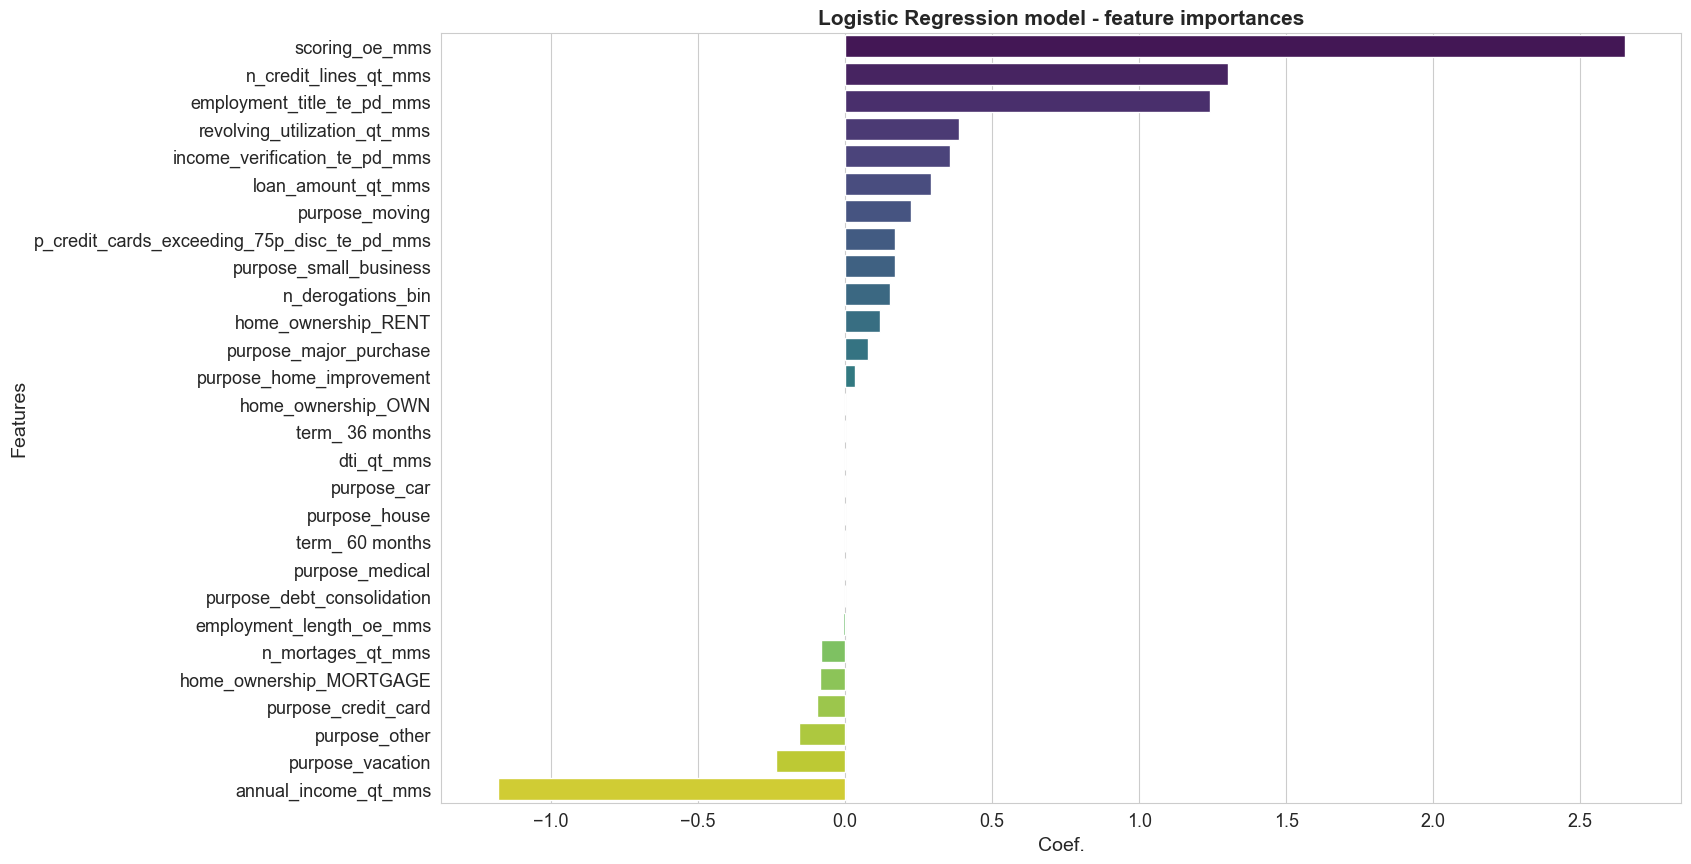

In [19]:
f,ax = plt.subplots(figsize=(16,10))

sns.barplot(data=pd.DataFrame(data=lr.coef_,
             columns=lr.feature_names_in_).T.reset_index() \
                       .rename(columns={'index':'feature',0:'coef'}).sort_values(by='coef',ascending=False),
            x='coef', y='feature',
            palette='viridis')
plt.title(label='Logistic Regression model - feature importances',fontsize=15, fontweight='bold');
plt.xlabel('Coef.',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13);

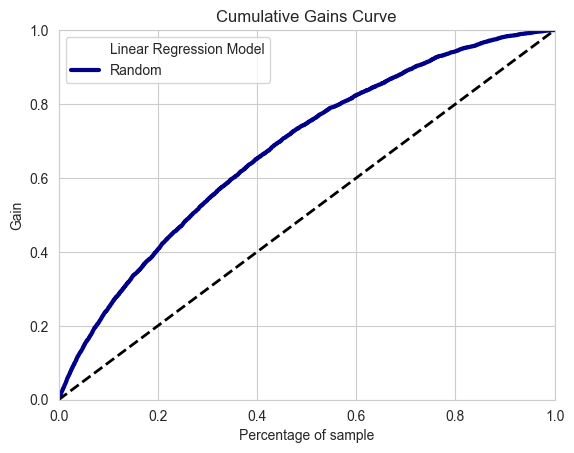

In [20]:
fig, ax = plt.subplots()
skplt.metrics.plot_cumulative_gain(val_y, model.best_estimator_.predict_proba(val_x), ax=ax)

# Hide the first line (zeroes class line)
ax.lines[0].set_visible(False)

# Customize the color of the remaining first visible line
ax.lines[1].set_color("darkblue")

# Adjust the legend to match the visible lines
plt.legend(labels=['Linear Regression Model', 'Random'])

# Display the plot
plt.show()

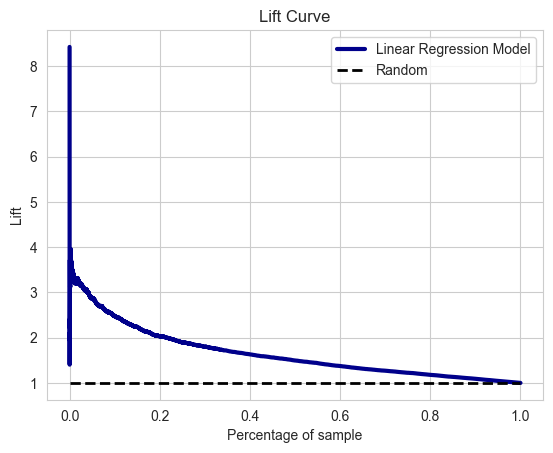

In [22]:
fig, ax = plt.subplots()

# Plotting the lift curve
skplt.metrics.plot_lift_curve(val_y, model.best_estimator_.predict_proba(val_x), ax=ax)

# Removing the zeroes class line
ax.lines[0].remove()

# Customize the color of the remaining line
ax.lines[0].set_color("darkblue")

# Adjust the legend to match the visible lines
plt.legend(labels=['Linear Regression Model', 'Random'])

# Display the plot
plt.show()

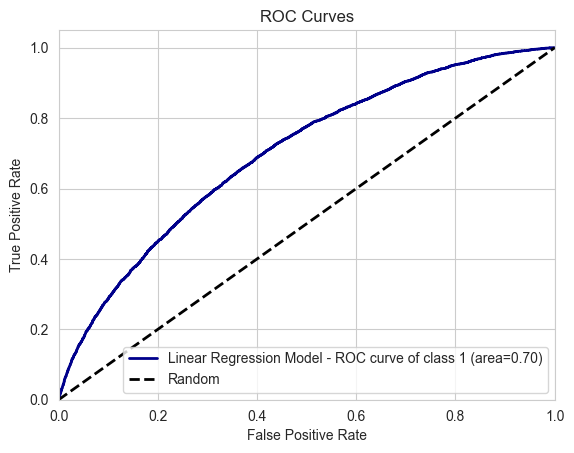

In [23]:
fig, ax = plt.subplots()

skplt.metrics.plot_roc(val_y, lr.predict_proba(val_x), ax=ax,
                       plot_micro=False,
                       plot_macro=False,
                       classes_to_plot=1)
plt.gca().get_lines()[0].set_color("darkblue")
plt.legend(labels = ['Linear Regression Model - ROC curve of class 1 (area=0.70)','Random']);